In [1]:
!pip install pandas
!pip install matplotlib
!pip install numpy

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt


# Pandas
Pandas is a Python library focused on data manipulation and analysis. It can be seen as an extension of NumPy, and is based on the NumPy `ndarray`, `dtype` and corresponding functionalities. Pandas offers data structures and operations for manipulating tabular data and time series. Pandas introduces 2 new data structure - `Series` and `DataFrame`. 

## Series
The `Series` structure is similar to the 1-dimensional NumPy array, with the addition of an *index* attribute. It can be created from `list`s, `ndarray`s and similar objects. As with `ndarray`, all items must be of the same `dtype`.

In [2]:
simple_series = pd.Series(list("abcdefg"))
print(simple_series)

0    a
1    b
2    c
3    d
4    e
5    f
6    g
dtype: object


*Note: by default, a `Series` is given an index of sequential numbers starting from 0*

In [3]:
print(simple_series.index)
print(simple_series.values)

RangeIndex(start=0, stop=7, step=1)
['a' 'b' 'c' 'd' 'e' 'f' 'g']


### `Series` index

##### Accesing `Series` by index

In [4]:
simple_series[0]
simple_series[2:5]

2    c
3    d
4    e
dtype: object

##### Manual `Series` index

In [5]:
indexed_series = pd.Series(np.linspace(0.,2.,9), index = list('abcdefghi'))
print(indexed_series)

a    0.00
b    0.25
c    0.50
d    0.75
e    1.00
f    1.25
g    1.50
h    1.75
i    2.00
dtype: float64


In [6]:
print("indexed_series['b']:",indexed_series['b'])
print("indexed_series[1]:",indexed_series[1])
print("indexed_series['c':'h']:\n",indexed_series['c':'h'])
print("indexed_series[3:8]:\n",indexed_series[2:7])


indexed_series['b']: 0.25
indexed_series[1]: 0.25
indexed_series['c':'h']:
 c    0.50
d    0.75
e    1.00
f    1.25
g    1.50
h    1.75
dtype: float64
indexed_series[3:8]:
 c    0.50
d    0.75
e    1.00
f    1.25
g    1.50
dtype: float64


In [7]:
indexed_series.index = [i for i in range(0,18,2)]
print(indexed_series)

0     0.00
2     0.25
4     0.50
6     0.75
8     1.00
10    1.25
12    1.50
14    1.75
16    2.00
dtype: float64


In [8]:
print("indexed_series[0]:",indexed_series[0])
print("indexed_series[2]:",indexed_series[2])
print("indexed_series[2:7]:\n",indexed_series[2:7])

indexed_series[0]: 0.0
indexed_series[2]: 0.25
indexed_series[2:7]:
 4     0.50
6     0.75
8     1.00
10    1.25
12    1.50
dtype: float64


In [9]:
#print("indexed_series[1]:",indexed_series[1])

*Accessing `Series` elements using the square brackets `[]` operator can be confusing and inconsistent when the index is not a sequential range. Use `loc` and `iloc` instead.*

In [10]:
print(indexed_series.loc[2]) #access by Series index (index location)
print(indexed_series.iloc[2]) #acces by Series item number (integer location)

0.25
0.5


In [11]:
print(indexed_series.loc[2:8]) 
print(indexed_series.iloc[2:8]) 

2    0.25
4    0.50
6    0.75
8    1.00
dtype: float64
4     0.50
6     0.75
8     1.00
10    1.25
12    1.50
14    1.75
dtype: float64


In [12]:
indexed_series.loc[0] = -1
print(indexed_series)

0    -1.00
2     0.25
4     0.50
6     0.75
8     1.00
10    1.25
12    1.50
14    1.75
16    2.00
dtype: float64


In [13]:
indexed_series.loc[2:4] = -2
print(indexed_series)

0    -1.00
2    -2.00
4    -2.00
6     0.75
8     1.00
10    1.25
12    1.50
14    1.75
16    2.00
dtype: float64


In [14]:
indexed_series.loc[6:12] = [0,0.25,.75,1]
print(indexed_series)

0    -1.00
2    -2.00
4    -2.00
6     0.00
8     0.25
10    0.75
12    1.00
14    1.75
16    2.00
dtype: float64


In [120]:
ascii_series = pd.Series({"a":97, "b":98,"c":99,"d":100,"A":65, "B":66,"C":67,"D":68})
print(ascii_series)

a     97
b     98
c     99
d    100
A     65
B     66
C     67
D     68
dtype: int64


In [121]:
ascii_series.loc['E'] = 69
ascii_series.loc['e'] = 101
print(ascii_series)

a     97
b     98
c     99
d    100
A     65
B     66
C     67
D     68
E     69
e    101
dtype: int64


In [122]:
expanded_series = pd.Series({"f":102, "g":103,"h":104,"i":105,"F":70, "G":71,"H":72,"I":73})
ascii_series = ascii_series.append(expanded_series)
print(ascii_series)
print("******")
print(ascii_series.loc['a':'f'])

a     97
b     98
c     99
d    100
A     65
B     66
C     67
D     68
E     69
e    101
f    102
g    103
h    104
i    105
F     70
G     71
H     72
I     73
dtype: int64
******
a     97
b     98
c     99
d    100
A     65
B     66
C     67
D     68
E     69
e    101
f    102
dtype: int64


In [19]:
ascii_series.sort_index(inplace=True)
print(ascii_series)
print("******")
print(ascii_series.loc['a':'f'])

A     65
B     66
C     67
D     68
E     69
F     70
G     71
H     72
I     73
a     97
b     98
c     99
d    100
e    101
f    102
g    103
h    104
i    105
dtype: int64
******
a     97
b     98
c     99
d    100
e    101
f    102
dtype: int64


# DataFrame
The Pandas `DataFrame` is used to hold tabular data (tables, similar to SQL or Excel). It can be seen as a 2-dimensional `ndarray` where the columns are an ordered sequence of aligned `Series` objects (sharing the same index). It can also be seen as a specialized version of the Python `dict` object, where the keys are column names and values are the `Series` mapped to each name.

In [28]:
unicode_series = pd.Series(dict(zip(list("ABCDEFGHIabcdefghi"),[i for i in range(41,50)]+[i for i in range(61,70)])))
print(unicode_series)

A    41
B    42
C    43
D    44
E    45
F    46
G    47
H    48
I    49
a    61
b    62
c    63
d    64
e    65
f    66
g    67
h    68
i    69
dtype: int64


In [30]:
df = pd.DataFrame({'ascii':ascii_series,'unicode':unicode_series})
df

,ascii,unicode
A,65,41
B,66,42
C,67,43
D,68,44
E,69,45
F,70,46
G,71,47
H,72,48
I,73,49
a,97,61


In [32]:
print(df.index)
print(df.columns)

Index(['A', 'B', 'C', 'D', 'E', 'F', 'G', 'H', 'I', 'a', 'b', 'c', 'd', 'e',
       'f', 'g', 'h', 'i'],
      dtype='object')
Index(['ascii', 'unicode'], dtype='object')


##### Accessing a DataFrame

In [51]:
df['ascii'] #index by columns

A     65
B     66
C     67
D     68
E     69
F     70
G     71
H     72
I     73
a     97
b     98
c     99
d    100
e    101
f    102
g    103
h    104
i    105
Name: ascii, dtype: int64

In [52]:
df.unicode #columns as attributes

A    41
B    42
C    43
D    44
E    45
F    46
G    47
H    48
I    49
a    61
b    62
c    63
d    64
e    65
f    66
g    67
h    68
i    69
Name: unicode, dtype: int64

*Note: accessing via attribute method can be dangerous if the column name corresponds to an existing attribute or function of the DataFrame object. In this case, the object's attribute will be returned (or modified!) instead of the column. It is safest to use the indexing access method.*

In [53]:
df.values

array([[ 65,  41],
       [ 66,  42],
       [ 67,  43],
       [ 68,  44],
       [ 69,  45],
       [ 70,  46],
       [ 71,  47],
       [ 72,  48],
       [ 73,  49],
       [ 97,  61],
       [ 98,  62],
       [ 99,  63],
       [100,  64],
       [101,  65],
       [102,  66],
       [103,  67],
       [104,  68],
       [105,  69]])

In [101]:
df["A":"a"] #despite indexing by columns, slicing is done by index

,ascii,unicode,order
A,65,41,1
B,66,42,2
C,67,43,3
D,68,44,4
E,69,45,5
F,70,46,6
G,71,47,7
H,72,48,8
I,73,49,9
a,97,61,1


In [99]:
df[0:9] # or slice by row number

,ascii,unicode,order
A,65,41,1
B,66,42,2
C,67,43,3
D,68,44,4
E,69,45,5
F,70,46,6
G,71,47,7
H,72,48,8
I,73,49,9


In [102]:
df[df.ascii > 70]

,ascii,unicode,order
G,71,47,7
H,72,48,8
I,73,49,9
a,97,61,1
b,98,62,2
c,99,63,3
d,100,64,4
e,101,65,5
f,102,66,6
g,103,67,7


In [106]:
print(df.ascii > 70)
print (type(df.ascii > 70))

A    False
B    False
C    False
D    False
E    False
F    False
G     True
H     True
I     True
a     True
b     True
c     True
d     True
e     True
f     True
g     True
h     True
i     True
Name: ascii, dtype: bool
<class 'pandas.core.series.Series'>


###### Boolean operators on DataFrame columns create a `Series` of boolean values, mapping DF indices to the results of the boolean test.

### DateFrame Views

In [57]:
df.T # transposed view

,A,B,C,D,E,F,G,H,I,a,b,c,d,e,f,g,h,i
ascii,65,66,67,68,69,70,71,72,73,97,98,99,100,101,102,103,104,105
unicode,41,42,43,44,45,46,47,48,49,61,62,63,64,65,66,67,68,69


*Note: as with NumPy arrays, some functions for Series and DataFrames return a reference (view), and some return a copy. Modifying views will modify the original object.*

In [58]:
print(df.head())
print(df.tail())

   ascii  unicode
A     65       41
B     66       42
C     67       43
D     68       44
E     69       45
   ascii  unicode
e    101       65
f    102       66
g    103       67
h    104       68
i    105       69


In [60]:
head = df.head()
head['ascii']['A'] = 0
print(df)

   ascii  unicode
A      0       41
B     66       42
C     67       43
D     68       44
E     69       45
F     70       46
G     71       47
H     72       48
I     73       49
a     97       61
b     98       62
c     99       63
d    100       64
e    101       65
f    102       66
g    103       67
h    104       68
i    105       69


/srv/conda/envs/notebook/lib/python3.7/site-packages/IPython/core/interactiveshell.py:3343: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  exec(code_obj, self.user_global_ns, self.user_ns)


In [61]:
df.T['A']['ascii'] = 65
print(df)

   ascii  unicode
A     65       41
B     66       42
C     67       43
D     68       44
E     69       45
F     70       46
G     71       47
H     72       48
I     73       49
a     97       61
b     98       62
c     99       63
d    100       64
e    101       65
f    102       66
g    103       67
h    104       68
i    105       69


In [75]:
df['lower'] = df.index.str.lower()
print(df.head())

   ascii  unicode  diff order lower
A     65       41    24     a     a
B     66       42    24     b     b
C     67       43    24     c     c
D     68       44    24     d     d
E     69       45    24     e     e


In [86]:
df['order'] = df['lower'].apply(ord) - ord('a') + 1
print(df)

   ascii  unicode  diff  order lower
A     65       41    24      1     a
B     66       42    24      2     b
C     67       43    24      3     c
D     68       44    24      4     d
E     69       45    24      5     e
F     70       46    24      6     f
G     71       47    24      7     g
H     72       48    24      8     h
I     73       49    24      9     i
a     97       61    36      1     a
b     98       62    36      2     b
c     99       63    36      3     c
d    100       64    36      4     d
e    101       65    36      5     e
f    102       66    36      6     f
g    103       67    36      7     g
h    104       68    36      8     h
i    105       69    36      9     i


In [95]:
df.drop('lower',1,inplace=True)
print(df)

   ascii  unicode  order
A     65       41      1
B     66       42      2
C     67       43      3
D     68       44      4
E     69       45      5
F     70       46      6
G     71       47      7
H     72       48      8
I     73       49      9
a     97       61      1
b     98       62      2
c     99       63      3
d    100       64      4
e    101       65      5
f    102       66      6
g    103       67      7
h    104       68      8
i    105       69      9


### `loc` and `iloc` in DataFrames
In `DataFrame`s, the `loc` and `iloc` access by index and sequence number respectively. The accessor accepts 2 indicers, the first being the row and the second being the column.

In [107]:
df.loc['A','ascii']

65

In [111]:
df.loc['A',['ascii','order']]

ascii    65
order     1
Name: A, dtype: int64

In [112]:
df.loc['A':'E',['ascii','order']]

,ascii,order
A,65,1
B,66,2
C,67,3
D,68,4
E,69,5


In [113]:
df.iloc[1,2] # row 1, column 2

2

In [118]:
df.iloc[6:,-1] # row 6:end, last column

G    7
H    8
I    9
a    1
b    2
c    3
d    4
e    5
f    6
g    7
h    8
i    9
Name: order, dtype: int64

In [117]:
df.iloc[1:4,1:3] #row 1-3, column 1-2

,unicode,order
B,42,2
C,43,3
D,44,4


# Working Example - Sea Ice

In [126]:
sea_ice = pd.read_csv('sea-ice-fixed.csv',index_col='Date') # explicitly define column as index
sea_ice.head()

,Dataset,hemisphere,Extent
Date,,,
1978-10-26 00:00:00,nsidc0051,north,10.231
1978-10-28 00:00:00,nsidc0051,north,10.420
1978-10-30 00:00:00,nsidc0051,north,10.557
1978-11-01 00:00:00,nsidc0051,north,10.670
1978-11-03 00:00:00,nsidc0051,north,10.777


In [131]:
sea_ice.index = pd.to_datetime(sea_ice.index)
sea_ice.head()

,Dataset,hemisphere,Extent
Date,,,
1978-10-26,nsidc0051,north,10.231
1978-10-28,nsidc0051,north,10.420
1978-10-30,nsidc0051,north,10.557
1978-11-01,nsidc0051,north,10.670
1978-11-03,nsidc0051,north,10.777


In [144]:
sea_ice[sea_ice.index > '1980'].head(10)

,Dataset,hemisphere,Extent
Date,,,
1980-01-03,nsidc0051,north,14.302
1980-01-05,nsidc0051,north,14.414
1980-01-07,nsidc0051,north,14.518
1980-01-09,nsidc0051,north,14.594
1980-01-11,nsidc0051,north,14.665
1980-01-13,nsidc0051,north,14.771
1980-01-15,nsidc0051,north,14.831
1980-01-17,nsidc0051,north,14.957
1980-01-19,nsidc0051,north,15.120


hemisphere
north    AxesSubplot(0.125,0.2;0.775x0.68)
south    AxesSubplot(0.125,0.2;0.775x0.68)
dtype: object

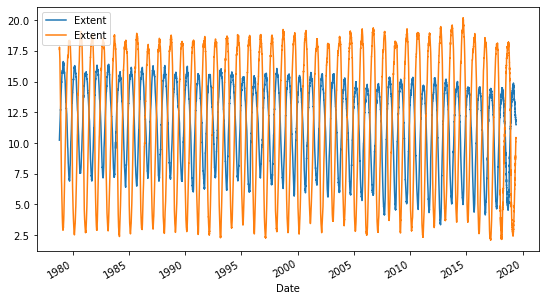

In [155]:
fig, ax = plt.subplots(figsize=(9,5))
sea_ice.groupby('hemisphere').plot(ax=ax)